# Dimensionality Reduction

# 1. 차원축소란

>  
차원 축소는, 주어진 데이터의 차원을 고차원에서 저차원으로 축소시키는 것이다.  
 (데이터의 의미를 나타내는 특징들을 추려내는 것)  
 
 
데이터가 손실될 수도 있음에도 차원을 축소하는 이유는 **'차원의 저주'** 때문이다.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://cdn-images-1.medium.com/max/1600/1*GoAgFuRFa8cTWSUB6d2mDA.png")

1. 차원을 늘릴수록 같은 공간에서 나타낼 수 있는 데이터가 기하급수적으로 감소(모델 학습, 예측에 시간 비용 증가)  

2. 차원이 클수록 분류기와 같은 모델들의 성능이 급격하게 감소 (noise data도 증가) 

# 2. 차원축소 기법

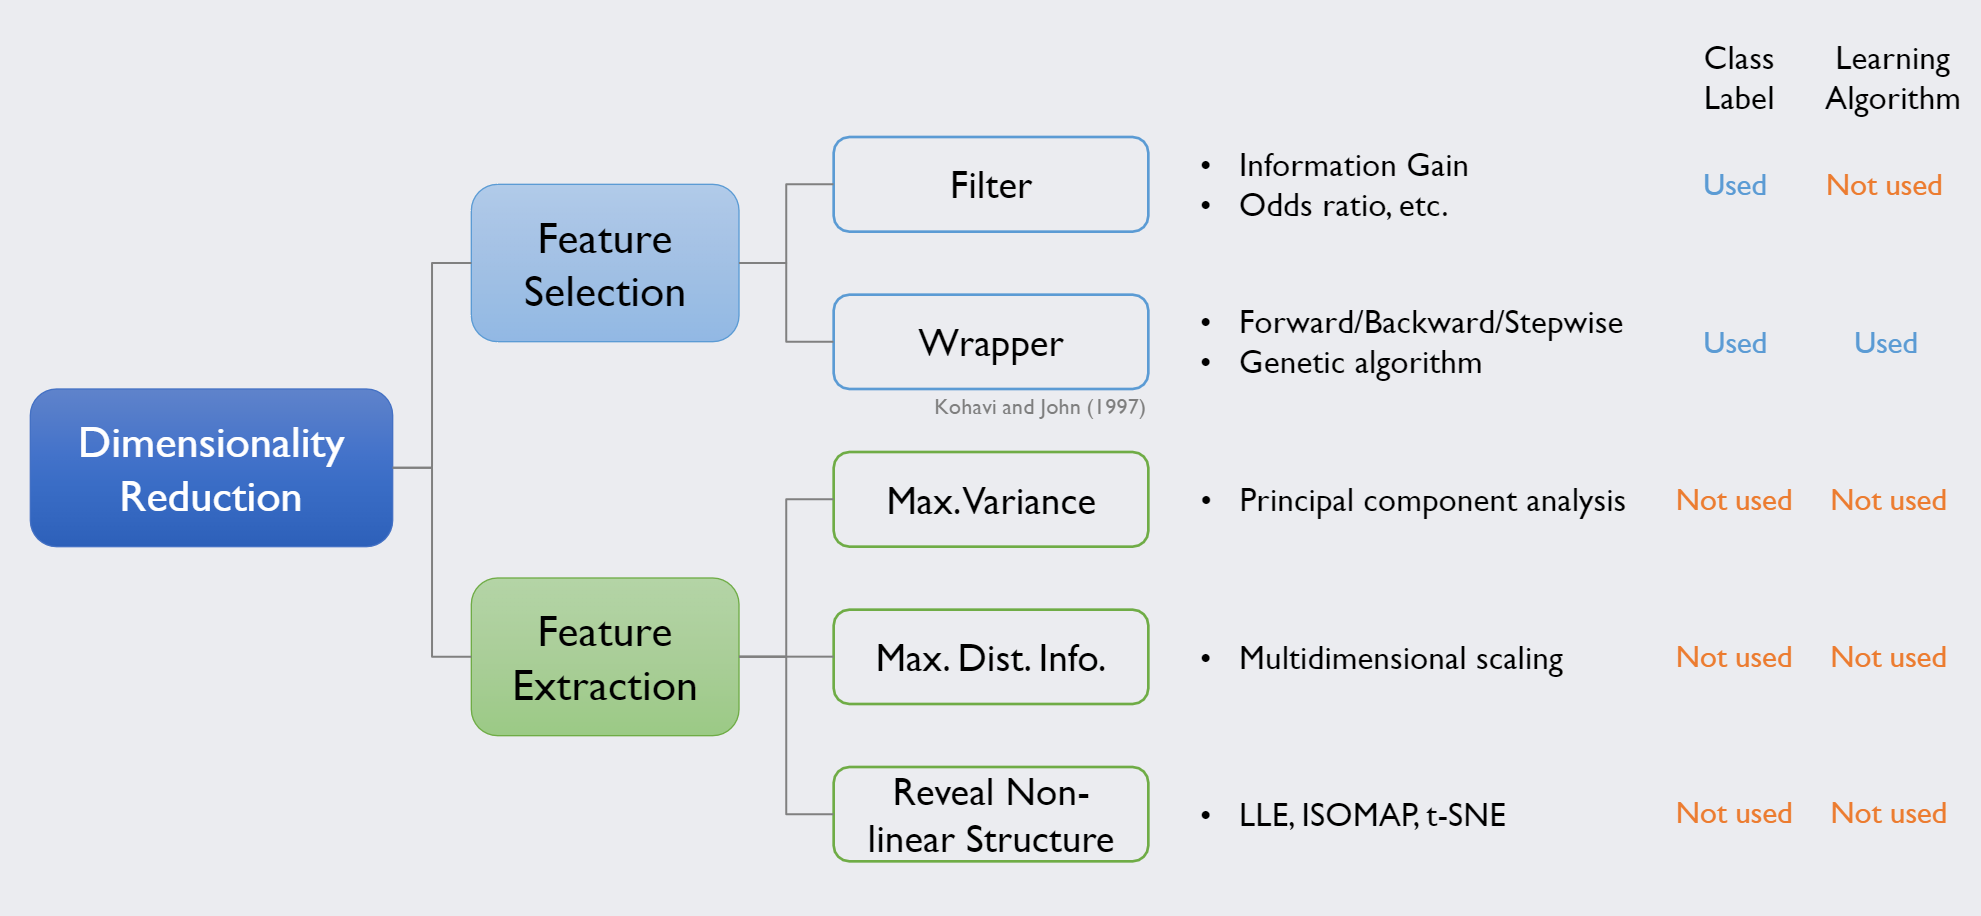

In [3]:
Image(filename="C:/Users/dsba/Downloads/ba/차원축소기법.png",width=700,height=350)

>  
**Supervised** : Class Label을 이용해서 특징들을 선택하는 방법  
                    ( Filter  : 해당 변수가 추가될시 나타나는 Gain 값만을 기준으로 선택 / 변수로 인해 발생할 확률들을 기준으로 선택 )  
                    ( Wrapper : 알고리즘의 결과를 최적화하는 방향으로 선택 / 회귀는 p-value, 의사결정나무는 acc값 등을 이용해 판단 )  
                               but, 변수 자체가 지워지는 단점이 있다.  
**Unsupervised** : Label 없이 독립변수들만으로 새로운 특징들을 조합, 추출해내는 방법  (변수들 자체의 분산을 이용하기에 결과는 항상 같다)  
                         새롭게 만들어진 축을 설명하기 어렵다.

# 3. Unsupervised Methods - Linear Embedding 
    - 다양한 기법 중, 이번 포스트에서는 PCA와 MDS를 다루겠습니다.

## 1. PCA (Principal Component Analysis)
    -> 원 데이터의 분산(변동성)을 가장 잘 보존하는 기저를 찾는 과정 (변수의 차원을 줄이면서)  
   output : **새로운 기저와 보존된 분산 값**. 새 좌표를 구하려면 기저벡터로 project 시켜야 함.

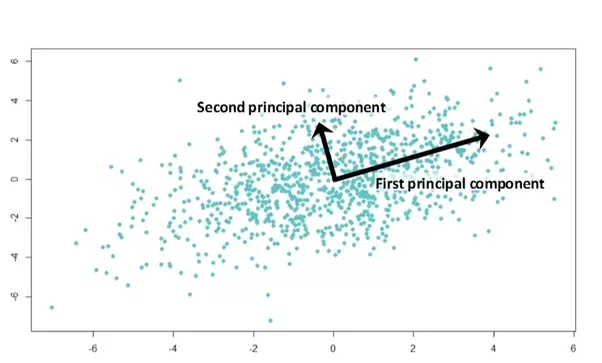

In [4]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename="C:/Users/dsba/Downloads/ba/pca.png",width=400,height=450)

### 1-1. PCA 과정  
   기존의 점들을 새로운 성분의 축으로 project 시켰을 때 '****분산이 최대한 유지****' 되도록 하는 성분을 찾는 것.  
   1. data centering을 진행해서 변수들의 평균을 0으로 setting 한다. (PCA는 가우시안 분포에 적합하기 때문.)
   2. 기존의 point들에 대한 벡터를 x, 새로운 기저 벡터를 w로 설정한다.
   3. 기존의 point인 벡터 x를 벡터 w에 project 시킨 벡터를 구하고 project된 point 벡터를 이용해 분산을 표현한다.
   
   $$w^TX$$
   $$v=(w^TX)(w^TX)^T=nw^TSw$$  

   3. 그 분산을 최대화하는 식을 정의하고, Lagrangian multiplier를 이용해 문제를 재정의한다.
      $$max. w^TSw$$
   $$s.t. w^Tw=1$$
   4. 재정의된 최대화 문제를 미분하면, 고유값분해가 가능한 형태가 된다.
   $$(S-\lambda I)w =0$$
   5. EVD를 통해 고유값과 고유벡터를 구한다.  
   5. 고유값은 새로운 성분의 분산을 의미하고, 고유벡터는 새로운 성분 벡터를 의미한다.(새로운 성분은 기존의 차원 수 만큼 생성되며, 필요에 맞게 선택한다.)
   $$\lambda _1, \lambda _2, \lambda _3 ...  ,  w_1, w_2, w_3 ...$$

### 1-2. Code 구현

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0) #data centering - PCA는 가우시안 분포에 적합하기 때문에 처리해줘야 함.


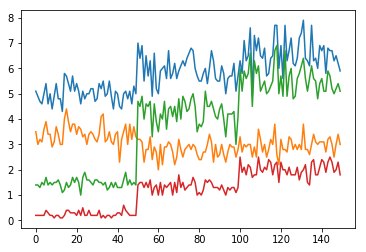

In [72]:
plt.plot(X)

데이터는 uci에서 대표적인 데이터인 iris 데이터를 이용해보았다.  
위의 그래프는 네 가지 특징을 그냥 그린 것이며, 특징마다 scale이 매우 다름을 알 수 있다. 

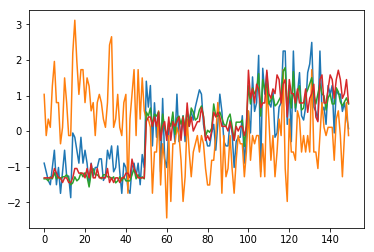

In [73]:
plt.plot(X_std)

data centering을 거친 데이터로, 각 색마다, 즉 각 특징마다 데이터의 평균을 0으로 setting되었음을 볼 수 있다.  


centering된 데이터로 공분산 행렬을 만들고 고유값 분해를 통해 고유값과 고유벡터를 구한다.

In [74]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) #centering된 데이터로 이용해 공분산 행렬을 만든다.
eig_vals, eig_vecs = np.linalg.eig(cov_mat) #공분산 행렬을 이용해 고유값과 고유벡터를 구함.

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 
eig_pairs.sort(key = lambda x: x[0], reverse=True) #고유값과 벡터를 set으로 내림차순 정리.
total = sum(eig_vals) #총분산에 대한 비율을 알기 위한 값

explained_var = [(i/total) * 100 for i in sorted(eig_vals, reverse=True)] #전체에서 차지하는 %비율 계산
cum_var = np.cumsum(explained_var)# 누적 비율 계산.
print(explained_var)
print(cum_var)

[72.77045209380132, 23.03052326768065, 3.683831957627394, 0.5151926808906336]
[ 72.77045209  95.80097536  99.48480732 100.        ]


위의 수치는 고유값의 비율을 높은 순서대로 나열한 것으로, 첫 번째 추출된 성분이 기존 데이터 분산의 72.8%를 설명한다고 해석할 수 있다.  

그리고 2개의 성분만으로, 기존 변수 4개 중 96%를 설명할 수 있는 것이다. 아래의 그림에서 성분의 설명력과 누적 설명력의 향상을 확인할 수 있다.

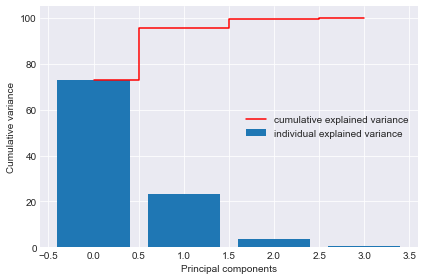

In [75]:
with plt.style.context('seaborn-darkgrid'):
    plt.bar(range(len(explained_var)), explained_var, align='center',
            label='individual explained variance')
    plt.step(range(len(explained_var)), cum_var, where='mid',
             label='cumulative explained variance', color="red")
    plt.ylabel("Cumulative variance")
    plt.xlabel("Principal components")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

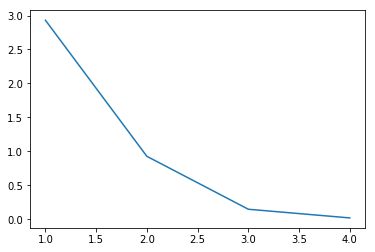

In [76]:
x=[1,2,3,4]
plt.plot(x, eig_vals) #고유값에 대한 scree plot.  3이면 , 첫 성분이 3개 정도의 변수를 설명하는 비중이라고 볼 수 있음.
                        #이를 바탕으로 적절한 개수의 성분을 선택.

고유값이 높은 순서대로 나타낸 것으로, 첫 성분이 대략 전체 4개 중 3개정도의 특징을 대변한다고 해석할 수 있다.  
이 고유값 정보와 성분들이 설명하는 비중을 기반으로 성분의 개수를 선택하게 된다.

**일반적으로 누적 설명비중은 80%정도, 그리고 고유값은 1이상인 값까지 선택한다.  
(1이하라는 것은 성분을 1개 추가해도 설명되는 특징이 1개만큼 증가하지 못한다는 것이기 때문에) **

최종적으로 구해진 것은 축 벡터이기 때문에, 만약에 새로운 차원으로 project시킨 점들을 시각화하려면, 따로 계산과정을 거쳐야한다.

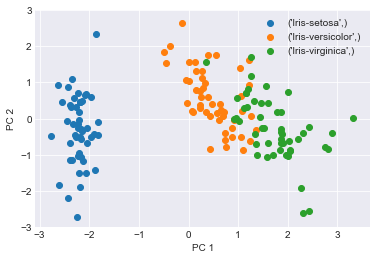

In [77]:
pc = 2
projection_matrix  = np.hstack((eig_pairs[i][1].reshape(len(eig_vals),1)) for i in range(pc))
Y = X_std.dot(projection_matrix)
label = df['class'].unique()
with plt.style.context("seaborn-darkgrid"):
    for l in zip(label):
        plt.scatter(Y[y==l,0], Y[y==l,1],
                    label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

주어진 데이터를 centering하고 공분산 행렬을 정의하고 고유값을 분해하여 그래프를 그리는 작업들을 정리해놓은 패키지가 있습니다.

### **scikit-learn 패키지를 이용하면 아래와 같이 간단한 코드로 주성분분석을 진행할 수 있습니다.**

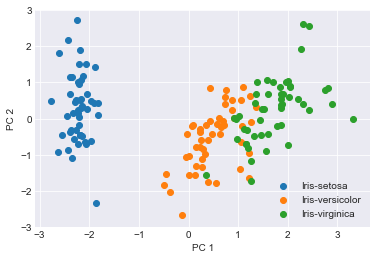

In [78]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2) #축 2개로 설정
Y_ = pca.fit_transform(X_std) #새로 설정된 성분으로 기존의 점들을 mapping
label = df['class'].unique()
label = np.unique(label)
with plt.style.context("seaborn-darkgrid"):  
    for l in label:
        plt.scatter(Y_[y==l,0], Y_[y==l,1],label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

### 1-3. PCA 와 LDA의 차이

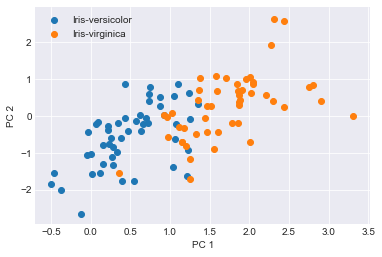

In [79]:
label2=label[1:3]
with plt.style.context("seaborn-darkgrid"):  
    for l in label2:
        plt.scatter(Y_[y==l,0], Y_[y==l,1],label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

위의 그림은 기존 데이터의 분산을 최대한으로 유지시킨 **PCA**를 적용한 데이터를 plot한 것이기 때문에 class간의 경계가 확실하지 않다.

In [57]:
import sklearn
from sklearn import discriminant_analysis
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
data_projected=lda.fit_transform(X,y)

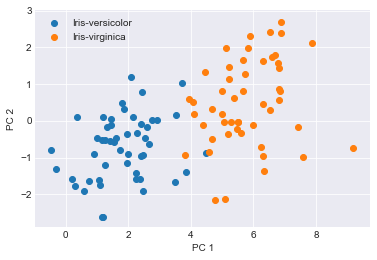

In [65]:
label3=np.unique(y)[1:3]
with plt.style.context("seaborn-darkgrid"):  
    for l in label3:
        plt.scatter(data_projected[y==l,0], data_projected[y==l,1],label=l)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.legend()
    plt.show()

그러나 위의 그림은 같은 데이터를 **LDA**를 적용시켜 plot한 그림으로 확연히 다른 결과를 보여준다.  
이 그림에서 알 수 있듯이, class가 다른 두 종류의 데이터들이 LDA를 통해서는 분류가 잘 되도록 mapping됨을 알 수 있다. 

### 1-4. PCA 적용 전후 학습시간 및 결과 비교

아래의 데이터는 여러가지 변수와 별인지, 은하인지, 퀘이사인지를 나타내는 class 변수가 존재하는 데이터이다.

변수의 개수는 16개, record는 10000개로, pca를 적용하기 전과 후에 k-means clustering을 학습하는데 걸리는 시간과 그 결과를 실제 라벨과 비교해보는 실험을 진행해보았다.

In [270]:
df = pd.read_csv(
    filepath_or_buffer='C:\\Users\\dsba\\Desktop\\2018-2\\Business Analytics\\pcatest.csv',
    header=None,
    sep=',')



X = df.iloc[1:, 0:17].values
y = df.iloc[1:,17].values
df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
1,1.24E+18,183.5313257,0.08969303,19.47406,17.0424,15.94699,15.50342,15.22531,752,301,4,267,3.72E+18,-8.96E-06,3306,54922,491,STAR
2,1.24E+18,183.5983705,0.135285032,18.6628,17.21449,16.67637,16.48922,16.3915,752,301,4,267,3.64E+17,-5.49E-05,323,51615,541,STAR
3,1.24E+18,183.6802074,0.126185092,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.23E+17,0.1231112,287,52023,513,GALAXY
4,1.24E+18,183.8705294,0.049910685,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.72E+18,-0.000110616,3306,54922,510,STAR


In [290]:
from sklearn.cluster import KMeans

t0=time()
kmeans1=KMeans(n_clusters=3, random_state=0).fit(X)
print(time()-t0)

for i in range(10000):
    if y[i]=='STAR':
        y[i]=2
    if y[i]=='GALAXY':
        y[i]=1
    if y[i]=='QSO':
        y[i]=0

print(sum(kmeans1.labels_==y)/100,"%")

0.10269618034362793
76.37 %


In [369]:
pca = sklearnPCA(n_components=2) #축 2개로 설정
Y_ = pca.fit_transform(X)

t0=time()
kmeans2=KMeans(n_clusters=3, random_state=0).fit(Y_)
print(time()-t0)


print(sum(kmeans2.labels_==y)/100,"%")

0.025930166244506836
76.37 %


y

실험결과에서 알 수 있듯이, pca를 적용하기 전과 후 모두 class를 분류하는 성공률은 비슷했지만 pca를 거치면 진행시간이 4배가량 빨라짐을 알 수 있었다.  

이렇게 간단한 데이터에서도 보이는 만큼, 데이터의 스케일이 매우 크고 변수의 수가 매우 많은 경우에는 저차원mapping이 어떠한 모델을 학습하는데 시간적인 비용을 줄여줄 수 있을 것으로 기대된다.

### 1-5. 비선형데이터의 경우

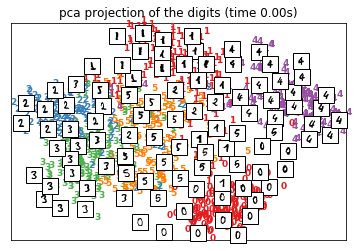

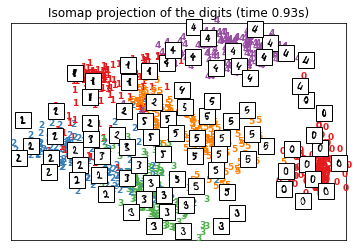

In [96]:
from sklearn import (datasets,random_projection)
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import Isomap

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    
    if title is not None:
        plt.title(title)
        
pca = sklearnPCA(n_components=2) #축 2개로 설정
t0=time()
Y_ = pca.fit_transform(X)
plot_embedding(Y_,"pca projection of the digits (time %.2fs)" %(time() - t0))
t0 = time()
sk_isomap = Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
plot_embedding(sk_isomap,"Isomap projection of the digits (time %.2fs)" %(time() - t0))




위의 그림에서 보면 확실히 pca를 이용한 경우가 경계가 좀 더 모호한 것을 알 수 있다.  
그리고 class별로 군집간의 거리정보를 봐도, 클래스마다의 거리를 최대한으로 보존하는 isomap 기법이 결과가 더 좋음을 알 수 있다.  

이와 같이 선형으로 성분을 뽑아내는 PCA 기법으로는 적절하지 않은 데이터들이 현실에서는 매우 많은데, 이는 다음 챕터에서 다룰 예정이다.

### 1-6. PCA 특징  및 요약
>   
   1. LDA는 분류를 목적으로 새로운 축을 생성하는 반면, PCA는 단순히 **분산을 유지**하는 방향으로 학습한다.  
   2. 도수분포표가 좌우대칭인, **가우시안 분포**에 적합하다. - centering 과정이 필요
   3. 데이터의 손실은 적지만 원래의 변수의 의미가 복합적으로 반영되므로 **축에 대한 해석이 주관적**일 수 있다.  
    - 4번에서도 언급하지만, 회귀분석이나 의사결정나무와 같이 변수의 의미가 중요시되는 모델에는 적합하지 않다.
   4. 변수자체의 해석보다는, 데이터의 차원이 너무 커서 모델에 **학습하는 시간 비용을 줄이기 위해** 이용.(영상인식에도 활용)
   5. 성분의 개수를 선택하는 것은 자율이나 일반적으로 **설명 비중이 80%, 고유값이 1이상**인 선에서 선택한다.

## 2. MDS (Multidimensional Scaling)
    -> 원 데이터의 정보(객체 간의 거리 즉, 객체 간 관계)를 가장 잘 보존하는 기저를 찾는 과정 (변수의 차원을 줄이면서)
    PCA와 다르게, 객체간의 거리 행렬(유사도 행렬 등)만으로 적용할 수 있음.(좌표가 주어진 경우, 거리 행렬을 만들어서 적용가능.)  
   output : 객체들의 **새로운 좌표**.

### 2-1. MDS 과정
    
   1. 거리행렬(유사도, 비유사도 행렬)을 정의한다. (주어지지 않은 경우, 데이터들을 이용해 거리 매트릭스를 생성(유클리디언, 자카드 등)  
   2. 거리행렬로 원 데이터를 구하기 위해, 다음과 같이 정의한 후 $$D = (x_r-x_s)^T *(x_r-x_s)$$ 로 나타낸 후, 식을 전개하고, 시그마를 이용해서 일부 x의 제곱값들을 d로 대체하면 $$B = x_r^T*x_s = -{1\over2} (d_{rs}^2 - {1\over n}\sum_{s=1}^n d_{rs}^2- {1\over n}\sum_{r=1}^n d_{rs}^2 +{1 \over n^2} \sum_{r=1}^n\sum_{s=1}^n d_{rs}^2)$$위와 같이 거리 매트릭스의 선형결합을 이용해서 나타낼 수 있다.  
   
   
   3. 그러면 B가 symmetric하고 positive semi-definite한 행렬임을 이용해, 센터링을 거쳐 고유값을 분해한다.  
     (정방행렬에는 EVD, 직방행렬에는 SVD를 이용. / SVD의 특이값은 변환 자체의 scale factor고/ EVD는 방향벡터에 대한 scale factor) 
       
     $$B=XX^T=VAV^T , A=diag(\lambda_1, \lambda_2 ... \lambda_n),V=[v_1,v_2...v_n]$$
     
     
   4. 구해진 고유값 중 eigen value = non-zero인 수를 추출하면 원 데이터를 100%보존하는 B를 구하고, 이로부터 원 데이터 행렬 X를 구할 수 있다.  
     (2차원으로 시각화하고 싶으면 2개의 고유값과 고유벡터만 선택하면, 2차원 상의 X 행렬을 구할 수 있음)
   
  

### 2-2. Code 구현

In [13]:
import sklearn
from sklearn import manifold
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')
X = df.iloc[:, 0:4].values
y = df.iloc[:,4].values

dists = np.zeros((len(X),len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        dists[i,j] = np.sqrt(np.sum((X[i,:]-X[j,:])**2)) #변수 i와 변수 j 사이의 거리를 제곱합의 제곱근으로 매트릭스화 함.

원 데이터가 주어져있지만, MDS에 적용하기 위해 유클리디언 거리를 기반으로 하는 거리 행렬을 만들었다.

In [10]:
dists

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

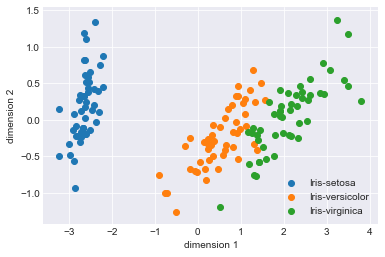

In [11]:
n = len(dists)

H = np.eye(n) - np.ones((n, n))/n

B = -H.dot(dists**2).dot(H)/2

eig_vals,eig_vecs = np.linalg.eigh(B) #symmetric matrix에서는 eigh사용.
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]

w = np.where(eig_vals > 0)
L = np.diag(np.sqrt(eig_vals[w]))
V = eig_vecs[:,w]
V = np.squeeze(V)
Y = V.dot(L)
import matplotlib.pyplot as plt
label = np.unique(y)
with plt.style.context("seaborn-darkgrid"):
    for l in label:
        plt.scatter(Y[y==l,0], Y[y==l,1],label=l) #고유값이 큰 순서대로 저장되어 있으므로, 가장 잘 설명하는 두 축에 대한 값만 plot 함.
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.legend()
    plt.show()

- 거리행렬을 기반으로, 분해한 고유값 중 2개를 선택하여 plot해보니, 분산만을 유지한 pca와 다르게 주황색과 초록색이 조금 더 잘 분리된 것을 볼 수 있었다.  
- 물론 분류를 목적으로 한 것은 아니지만 원 데이터의 성질상, 다른 **class 간의 거리가 유의미**했기 때문에 거리 정보를 보존한 MDS 기법에서 그것이 표현되었다고 생각한다.  

### **scikit-learn 패키지를 이용하면 아래와 같이 간단한 코드로 MDS를 진행할 수 있습니다.**

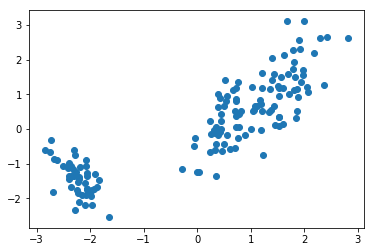

In [12]:
mds = sklearn.manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=3,
                   dissimilarity="precomputed", n_jobs=1)
out=mds.fit_transform(dists)
plt.scatter(out[:,0],out[:,1])

위의 그래프는 class의 정보와 관계없이 모든 point들에 대해서 MDS를 진행하여 2차원으로 나타낸 것이다. 

### **사회통계와 같은 분야에서 사용되는 데이터를 MDS를 통한 포지셔닝 맵 시각화 활용 **

구글에서 구한 데이터를 크롤링한 것으로, 15가지의 자동차 모델별로, 14가지의 특성이 수치화된 데이터이다.  

In [218]:
import requests
from bs4 import BeautifulSoup
from sklearn.preprocessing import StandardScaler
url = "https://people.sc.fsu.edu/~jburkardt/datasets/mds/hans_70.dat"
html = requests.get(url).text
html

'Hansohm 1970\n 15 14\nDAF 55/6 1100.0 45.0 11.20 2230.0 3880.0 800.0 23.0 132.0 10.5 6.0   77.0 444.0  325.0 35.0\nFIAT 128 1116.0 55.0 10.90 2448.0 3856.0 805.0 20.0 138.0 11.0 5.7  380.0 444.0 1460.0 35.6\nESCORT   1098.0 44.0 10.00 2400.0 4052.0 845.0 27.0 127.0 10.0 5.4  207.0 444.0 1930.0 34.5\nS ESCORT 1298.0 52.0 10.00 2400.0 4052.0 845.0 20.0 140.0 12.0 5.7  168.0 548.0 1930.0 36.0\nNSU 1200 1177.0 55.0 10.30 2440.0 4000.0 720.0 18.0 144.0 10.0 5.6   90.0 444.0 1400.0 35.1\nKADETT   1078.0 45.0 10.80 2416.0 4182.0 760.0 26.0 125.0  9.5 5.5 1284.0 444.0 2230.0 34.2\nS KADETT 1078.0 55.0 10.80 2416.0 4182.0 775.0 19.0 135.0 11.0 5.9  289.0 444.0 2200.0 35.8\nPEUGEOT  1130.0 55.0 10.30 2535.0 3990.0 885.0 19.0 142.0 10.5 6.5   91.0 444.0  750.0 36.5\n4 RENAUL  845.0 26.0  9.80 2420.0 3668.0 630.0 37.0 112.0  7.5 5.0  849.0 352.0 1320.0 28.9\nR RENAUL 1100.0 45.0 10.30 2420.0 3351.0 820.0 21.0 132.0  9.5 6.2   31.0 444.0 1320.0 35.7\n10 SIMCA  944.0 40.0 10.00 2220.0 3797.0 790.0 

In [219]:
data=[[None]]*15
k=0
for i in html.split("\n")[2:17]:
    data[k]=list(filter(lambda x: len(x)>0, i.split(" ")))
    k=k+1


In [220]:
for i in data:
    while len(i)>14:
        i.pop(0)
for i in range(len(data)):
    for j in range(14):
        data[i][j]=float(data[i][j])
data=np.array(data)



In [221]:
for j in range(len(data)):
    for i in range(len(data[j])):
        data[j][i]=data[j][i]/sum(data[j])

In [223]:
dists = np.zeros((15,15))
for i in range(15):
    for j in range(15):
        dists[i,j] = np.sqrt(np.sum((data[i,:]-data[j,:])**2))

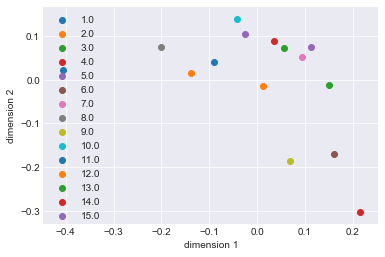

In [224]:
mds = sklearn.manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=3,
                   dissimilarity="precomputed", n_jobs=1)
out=mds.fit_transform(dists)
out2=np.c_[out,range(1,16)]

label = np.unique(out2[:,2])
with plt.style.context("seaborn-darkgrid"):
    for i in range(len(out2)):
        plt.scatter(out2[i,0], out2[i,1],label=out2[i,2]) 
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.legend()
    plt.show()

변수마다 scale이 달라서 정규화과정을 진행 후 그림을 그려보았다.  
위에 그림에서, 13번째 모델과 14번째 모델이 유사한 제품이라고 해석할 수 있는데, 실제로 1200 VW와 1300 VW로 후속 모델임을 알 수 있었다.  
그리고 위의 그래프에 각 변수들의 벡터를 그려보면, 제품마다 어떤 특성에 가까운지 파악도 가능하다.  

### 2-3. MDS 특징  
   >  
   1. 원래 차원에서의 거리순서를 고려하면서 저차원으로의 **거리정보가 유지**되도록 하는 차원을 구하는 것.  
   2. 시각적으로 객체간의 거리를 (유사한 정도를) **쉽게 해석하기 위해**서 저차원으로 mapping 하는 것.  
   3. 이 또한 변수 자체의 해석보다는, 타겟으로 설정한 변수들이 어떤 관계를 가지는지, 객체들간의 관계를 보기쉽게 **포지셔닝**하는데 이용한다.
   

PCA VS MDS   
OUTPUT, INPUT, 적합한 데이터형태, 축소의 목적, 

## 3. PCA vs MDS 간단요약


|        | PCA           | MDS         |
| -- | :-----------: | -------------------: |
| 학습   | 원 데이터 분산유지 |객체간 거리정보 유지|
| Input         |  데이터 좌표  | 객체간의 거리 행렬 |
| Output    | 새로운 기저   | 새 차원의 좌표       |
| 목적     | 효율적 학습을 위해 |객체간의 관계파악 위해|
